# Rapport TP: Réseau de Neurones



# Problème I : Problème de classification par un ou plusieurs « Simple Linear Perceptron » 


Dans cette partie notre but est de classifier les 4 points selon deux classes en utilisant un perceptrons ou plusieurs preceptrons simples sans coches cachées.

La première méthode que nous allons exploiter est la construction deux perceptrons avec deux neurones au niveau de la couche d'entrée  et une fonction d'activation linéaire. Ensuite faire la combinaison entre ces deux perceptrons  en utilisant des liens logiques. On fixe les poids du peremer perceptron on w=[1,-1] et du deuxième perceptron on w=[-1,1]

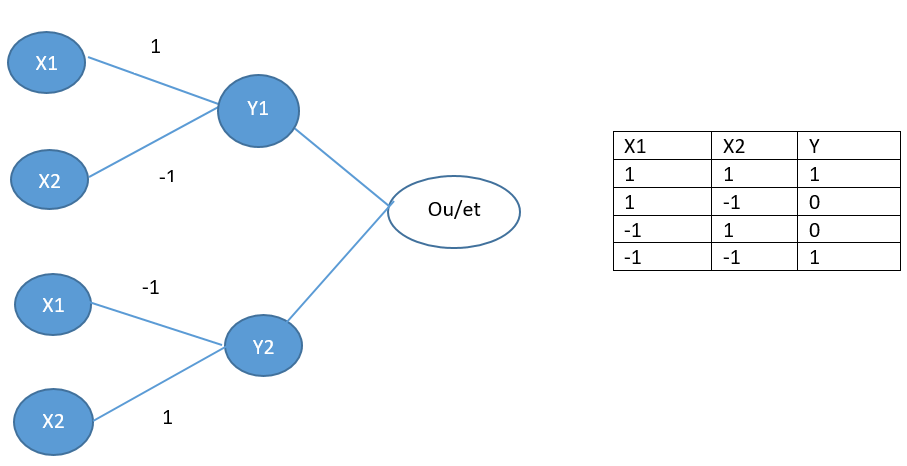

La deuxième méthode est d'ajouter un neurone dans la couche d'entré qui discrmine les points rouge des points blue en utilisant la varible X1*X2 qui va être égale à -1 pour la classe blue et 1 pour la classe rouge 

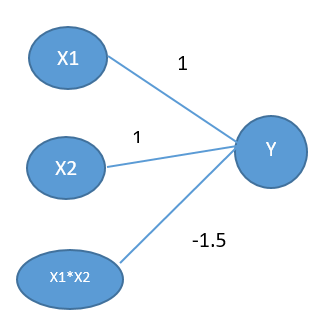

la variable $X1*X2$  nous donne 1 pour la classe rouge et -1 pour la classe blue, du coup on peut construire un perceptrone assez simple avec un seul neurone à l'entrée  qui prend la variable $X1*X2$ et un seul neurone à la sortie avec bien evidemment une fonction d'activation linéiare.  

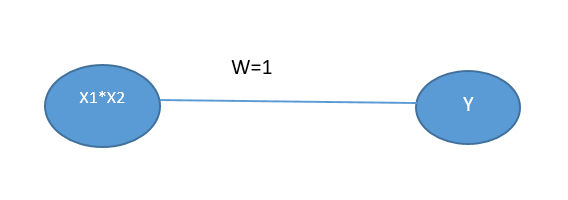

Si nous aurons l'apportunité d'utilisé une fonction d'activation non linéaire, on pourra résoufre ce problème de classification tout en utilisant un simple perceptron avec deux neurones en entrée. On opte du coup pour une fonction  périodique qui coupe le plan XY plus d’une fois,comme la fonction $f(x)=\exp(−𝑥^{2}) ou f(x)  une valeur absolue on aura pour les points (1,1) et (-1,-1) une sortie y=0 et pour les pints (-1,1) et (1,-1) une sortie y=1. On peut même avec  la fonction sigmoid

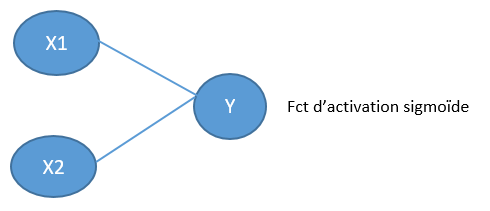

Un réseau de neurones avec plusieurs couches cachées dont toutes les fonction d'activation sont linéaire est totalement équivalent à un perceptron avec une seule fonction d'activation par ce que tout simplement un réseau de neurones en lui même se base sur une combinaison linéaire entre les poids des couches d'entrées en calculant la valeur $\sum_{i=1}^n w_{i}x_{i} +b$. Pour prouver notre réponse, on implémente un réseaux de neuronnes avec une seule couche cachée de deux neuronnes en utilisant bien évidemment différentes fonctions d'activation, et on arrive vers la fin à résoudre le problème de classification de la même manière faire dans les méthodes ci-dessus

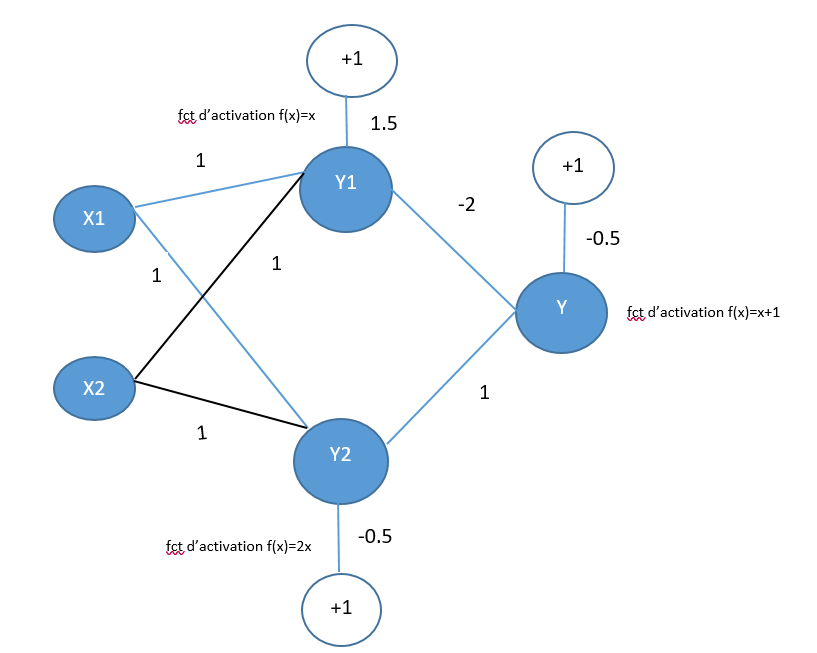

# Problème II : Réseau de neurones « From Scratch »

L'objectif de cette partie est d'implémenter un réseau de neurone from scratch en reproduisant tous les calculs faits dans le cour à la main pour pouvoir résoudre un problème de classification.
On va créer un réseau avec une couche cachée de 3 neurones et une fonction d’activation de type sigmoïde.

## Notre Neurone

On implemente notre neurone sous form d'une classe qui vas calculer les sorties 
  $z=\vec{x}\cdot\vec{w}+b=x_1\times w_1+x_2\times w_2+...+x_n\times w_n+b$
et applique une fonction d'activation

In [ ]:
# special objects for fully connected networks
import numpy as np
import os

class Neurone:
    def __init__(self, activation_function):
        self.activation_function = find_activation_function(activation_function)
        self.weights = None
        self.bias = np.random.random() - 0.5
        self.input = None
        self.output = None
        self.delta = None

    def __repr__(self):
        string = 'weights: ' + str(self.weights)
        string += '\nbias: ' + str(self.bias) + '\n'
        return string

    def calculate_z(self):
        z = self.bias
        for k in range(len(self.input)):
            z += self.input[k] * self.weights[k]
        return z

    def activate(self):
        self.output = self.activation_function(self.calculate_z())
        return self.output



## Layers 

Chaque classe represente une couche de notre réseau, elle initialise les paramétres de ses neurones et prepare une fonction pour  la forwad propagation.
Notre réseau est composé de trois couche.

In [ ]:
class FirstLayer:
    def __init__(self, n_neurones, activation_function):
        self.input = None
        self.output = None
        self.next_layer = None
        self.neurones = []
        for k in range(n_neurones):
            neurone_k = Neurone(activation_function)
            neurone_k.weights = [np.random.random() - 0.5]
            self.neurones.append(neurone_k)

    def __repr__(self):
        string = "Sensors layer:\n"
        for k in range(len(self.neurones)):
            neurone = self.neurones[k]
            string += f'neurone {k}\n'
            string += neurone.__repr__() + '\n'
        return string

    def compute_forward(self):
        output = []
        for k in range(len(self.input)):
            self.neurones[k].input = [self.input[k]]
            output.append(self.neurones[k].activate())
        self.output = output
        return self.output


class HiddenLayer:
    def __init__(self, n_neurones, activation_function):
        self.input = None
        self.output = None
        self.neurones = [Neurone(activation_function) for _ in range(n_neurones)]
        self.previous_layer = None
        self.next_layer = None

    def __repr__(self):
        string = "FC hidden layer:\n"
        for k in range(len(self.neurones)):
            neurone = self.neurones[k]
            string += f'neurone {k}\n'
            string += neurone.__repr__() + '\n'
        return string

    def feed_neurones(self):
        for neurone in self.neurones:
            neurone.input = self.input

    def compute_forward(self):
        output = []
        for neurone in self.neurones:
            output.append(neurone.activate())
        self.output = output
        return self.output

class OutcomeLayer:
    def __init__(self, n_neurones, activation_function):
        self.input = None
        self.output = None
        self.neurones = [Neurone(activation_function) for _ in range(n_neurones)]
        self.previous_layer = None


    def __repr__(self):
        string = "Outcome layer:\n"
        for k in range(len(self.neurones)):
            neurone = self.neurones[k]
            string += f'neurone {k}\n'
            string += neurone.__repr__() + '\n'
        return string

    def feed_neurones(self):
        for neurone in self.neurones:
            neurone.input = self.input

    def compute_forward(self):
        output = []
        for neurone in self.neurones:
            output.append(neurone.activate())
        self.output = output
        return self.output



## Notre Réseau

**Rétropropagation**

L'objectif est de trouver le minimum global de la perte concernant nos poids. Pour mettre à jour nos poids, nous devons d'abord savoir dans quelle mesure un petit changement de poids affectera notre fonction de perte. En d'autres termes, voici ce que nous devons trouver :

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$

Cependant, nous ne pouvons pas trouver la dérivée de $(y-\hat{y})^2$ par rapport à $w$ si elle n'existe pas dans l'expression. Heureusement, nous pouvons utiliser la règle de la chaîne pour surmonter cet obstacle.

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w} = \frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w}$

Pour rappel, lors de la propagation vers l'avant, nous avons défini $z=w \cdot x+b$. L'expression développée peut facilement être simplifiée.

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w} = -2(y-\hat{y}) * \sigma(z)(1-\sigma(z)) * x$

Le premier terme, $-2(y-\hat{y})$, et le dernier terme, $x$, sont assez faciles à dériver. Le moyen terme nous oblige à prendre la dérivée de la fonction sigmoïde. Nous ne le dériverons pas ici, mais la dérivée sigmoïde peut être écrite proprement en termes de fonction sigmoïde elle-même comme suit :

$\sigma^\prime(x)=\sigma(x)(1-\sigma(x))$

La valeur de $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$ que nous avons résolue, nous donne la valeur que nous appelons un gradient.

In [ ]:

class Network:
    def __init__(self):
        self.layers = []
        self.classes = None

    def show(self):
        string = ""
        for layer in self.layers:
            string += "\n==========\n" + layer.__repr__()
        print(string)

    def add(self, layer):
        if self.layers != []:
            self.layers[-1].next_layer = layer
            layer.previous_layer = self.layers[-1]
            for neurone in layer.neurones:
                neurone.weights = [np.random.random() - 0.5 for _ in range(len(layer.previous_layer.neurones))]
        self.layers.append(layer)

    def feed_forward(self, input):
        self.layers[0].input = input
        input = self.layers[0].compute_forward()
        for layer in self.layers[1:]:
            layer.input = input
            layer.feed_neurones()
            input = layer.compute_forward()
        return input

    def back_propagation(self, target, alpha, loss_function):
        output = self.layers[-1].output
        loss_prime = find_loss_function(loss_function)[1]
        for k in range(len(output)):
            neurone_k = self.layers[-1].neurones[k]
            activation_function = neurone_k.activation_function
            tk = target[k]
            yk = output[k]
            delta_k = loss_prime(tk, yk) * prime(activation_function)(neurone_k.calculate_z())
            neurone_k.delta = delta_k
            neurone_k.bias += alpha * delta_k
            for j in range(len(neurone_k.weights)):
                zj = neurone_k.input[j]
                neurone_k.weights[j] += alpha * delta_k * zj

        for l in range(len(self.layers)-2, -1, -1):
            layer = self.layers[l]
            for j in range(len(layer.neurones)):
                neurone_j = layer.neurones[j]
                delta_inj = 0
                for k in range(len(layer.next_layer.neurones)):
                    neurone_k = layer.next_layer.neurones[k]
                    delta_inj += neurone_k.delta * neurone_k.weights[j]
                delta_j = delta_inj * prime(activation_function)(neurone_j.calculate_z())
                neurone_j.delta = delta_j
                neurone_j.bias += alpha * delta_j
                for i in range(len(neurone_j.weights)):
                    xi = neurone_j.input[i]
                    neurone_j.weights[i] += alpha * xi * delta_j

    def add_classes(self, target):
        # to code
        return 0

    def forward_backward(self, x_train, y_train, alpha, loss_function):
        for i in range(len(x_train)):
            y_i = self.feed_forward(x_train[i])
            target_i = y_train[i]
            self.back_propagation(target_i, alpha, loss_function)

    def evaluate(self, x_test, y_test, loss_function, visible=True):
        err = 0
        global_loss_function = find_loss_function(loss_function)[2]
        for i in range(len(x_test)):
            xi = x_test[i]
            target_i = y_test[i]
            output_i = self.feed_forward(xi)
            err += global_loss_function(target_i, output_i)
        if visible:
            print(f"{loss_function} of the model: {err}")
        return err

    def fit(self, x_train, y_train, x_test, y_test, n_epochs, loss_function="mse", alpha=0.3):
        for epoch in range(n_epochs):
            if (epoch+1) % (n_epochs/10) == 0:
                print(f"epoch {epoch+1}/{n_epochs}")
                self.evaluate(x_test, y_test, loss_function)
            self.forward_backward(x_train, y_train, alpha, loss_function)

    def fit_err(self, x_train, y_train, x_test, y_test, max_err, loss_function="mse", alpha=0.3):
        epoch = 0
        print("Training...")
        while self.evaluate(x_test, y_test, loss_function, visible=False) > max_err:
            epoch += 1
            self.forward_backward(x_train, y_train, alpha, loss_function)
        print(f'Training completed in {epoch} epoch.')
        self.evaluate(x_test, y_test, loss_function, visible=True)

    def predict(self, input):
        if len(self.layers[-1].neurones) == 1:
            output = self.feed_forward(input)[0]
            if abs(output) < abs(1 - output):
                return 0
            else:
                return 1


## Fonctions d'activation

Dans notre cas on vas utilisé la fonction d'activation la plus courante qui est sigmoïde.

$\sigma(x)=\frac{1}{1+e^{-x}}$


<img src="https://tinyurl.com/ycggxehs" alt="sigmoid_graph" width="400"/>



Comme vous pouvez le voir sur ce graphique, $\sigma(x)\in(0, 1)$. Cette fonction d'activation permet de prédire une probabilité pour une sortie binaire. Il y a plusieurs autres fonctions d'activation. Les plus courants autres que sigmoïde sont ReLU, tanh et softmax.


In [ ]:
import numpy as np

def tanh(x) :
    return np.tanh(x)

def tanh_prime(x) :
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return max(0, x)

def ident(x):
    return x

def ident_prime(x):
    return 1

def prime(activation_function):
    L = [
            (tanh, tanh_prime),
            (sigmoid, sigmoid_prime),
            (ident, ident_prime)
    ]
    for el in L:
        if el[0] == activation_function:
            return el[1]

def find_activation_function(activation_function):
    if activation_function == 'sigmoid':
        return sigmoid
    elif activation_function == 'tanh':
        return tanh
    elif activation_function == 'relu':
        return relu
    elif activation_function == 'ident':
        return ident
    else:
        raise InputError('in SensitiveLayer', f"{activation_function} unknown. The activation function must be 'sigmoid', 'relu', 'tanh', ident.")


## Loss Function

**Fonction de perte**

Plusieurs fonctions existent pour accomplir cette tâche, cependant, la fonction de perte la plus courante pour les problèmes binaires est appelée **Binary Cross-Entropy**.

$\mathcal{L}(y, \hat{y})=-(y\log(\hat{y}) + (1-y)\log(1-\hat{y}))$

Dans notre cas on vas utilisé **MSE : the Sum of Squares error**

$\mathcal{L}(y, \hat{y})=(y-\hat{y})^{2}$


In [ ]:
class Error(Exception):
    """Base class for exceptions in this module."""
    pass


class InputError(Error):
    """Exception raised for errors in the input.

    Attributes:
        expression -- input expression in which the error occurred
        message -- explanation of the error
    """

    def __init__(self, expression, message):
        self.expression = expression
        self.message = message

In [ ]:
import numpy as np

def mse_global(target, output):
    #Mean Square Error on a vector
    target_vec = np.array(target)
    output_vec = np.array(output)
    return np.mean(np.power(target_vec - output_vec, 2))

def mse(tk, yk):
    return 0.5 * (tk - yk)**2

def mse_prime(tk, yk):
    return tk - yk

def find_loss_function(loss_function):
    if loss_function == 'mse':
        return mse, mse_prime, mse_global
    else:
        raise InputError('in back_propagation', f"{loss_function} unknown. The activation function must be 'mse'.")


## Implementation du réseau

In [ ]:


data = [
        [1, 1, 1, 0, 1],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0],
        ]

x = [sample[:-1] for sample in data]
y = [[sample[-1]] for sample in data]

brain = Network()

brain.add(FirstLayer(4, "sigmoid"))
brain.add(HiddenLayer(3, "sigmoid"))
brain.add(OutcomeLayer(1, "sigmoid"))

brain.fit_err(x, y, x, y, 0.01, 'mse')
print(brain.predict([1, 1, 1, 0]))
print(brain.predict([0, 1, 0, 0]))
print(brain.predict([1, 1, 1, 1]))
print(brain.predict([0, 0, 0, 1]))
print(brain.predict([0, 0, 0, 0]))

Training...
Training completed in 1101 epoch.
mse of the model: 0.009974702312127597
1
0
1
0
0


En implementant et exécutant notre réseau, on trouve que les prédictions sont tous correcte avec une erreur trop basse.

# Problème III : Classification

### Chargement et encodage des données

In [ ]:
import pandas as pd
data=pd.read_csv('HD_Complete_Data.csv',sep=';')
data.head(10)

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
#%% label encoding
from sklearn.preprocessing import LabelEncoder
marry_encoder = LabelEncoder()
catCol=['Sexe','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in catCol:
  marry_encoder.fit(data[col])
  marry_values = marry_encoder.transform(data[col])
  data[col]=marry_values

data.head(10)

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


### Partitionnement des données

In [ ]:
#data.shape = (918,12)

from sklearn.model_selection import train_test_split

X=data[['Age','Sexe','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak',
          'ST_Slope']]
Y=data[['HeartDisease']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

### Recherche du meilleur réseau de neurones

In [ ]:
#bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, SimpleRNN, Conv1D, MaxPooling2D, LeakyReLU
from tensorflow.keras import optimizers

#### Benchmark

On va considérer un premier modèle a une couche cachée de quatre neurones :

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu')) #hidden layer 1 : 4 neurones
model.add(Dense(1, activation='sigmoid')) #output
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 48        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


On teste notre modèle sur notre ensemble de données :

In [ ]:
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# now we just update our model fit call
history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=1)

Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 31.6850 - accuracy: 0.5967 - val_loss: 23.0587 - val_accuracy: 0.5272
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 17.3136 - accuracy: 0.5395 - val_loss: 13.6582 - val_accuracy: 0.5054
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 11.5962 - accuracy: 0.5054 - val_loss: 8.5623 - val_accuracy: 0.5761
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 7.6968 - accuracy: 0.5450 - val_loss: 5.9609 - val_accuracy: 0.5815
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 5.6103 - accuracy: 0.5409 - val_loss: 4.3352 - val_accuracy: 0.5598
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 3.9675 - accuracy: 0.5749 - val_loss: 2.7658 - val_accuracy: 0.6304
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 2.7013 - accuracy: 0.6185 - val_loss: 1.5742 - val_accuracy: 0.6522
Epoch 8/

On atteint une performance maximale à **val_accuracy = 0.87**, ce qui est très bien comme premier essai. On va faire une validation croisée de sur 12 ensembles pour avoir une valeur de performance qui représente correctement ce modèle, puis on cherchera à l'améliorer.

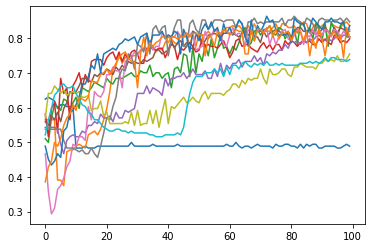

In [ ]:
#on fait une crossvalidation sur ce modèle : ça va être notre benchmark
#on va faire 12 CV

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy : en ligne chaque run, en colonne chaque itération

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire(?)
    model = Sequential()
    model.add(Dense(4, input_shape=(X_train.shape[1],), activation='relu')) #hidden layer 1
    model.add(Dense(1, activation='sigmoid')) #output
    
    model.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']

#on plot le vecteur val_accuracy (test accuracy) pour chaque run de crossvalidation
plt.plot(acc.T)

Les accuracies sont hétérogènes, variant de 0.5 à 0.85 (en fin de run). La plupart varie même lorsqu'elle sont stabilisées ; on va donc moyenner les 5 dernières valeurs de chaque courbe avant de moyenner sur les tests.

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_1=np.mean(moyacc)
print(acc_1)

0.779528982937336


On a finalement une première valeur de performance **accuracy = 0.78** qu'on va chercher à augmenter en jouant sur les paramètres du modèle.

#### Paramètre 1 : fonction d'activation

Dans nos modèles précédents, notre fonction d'activation était la fonction ReLU. On va en tester d'autres.

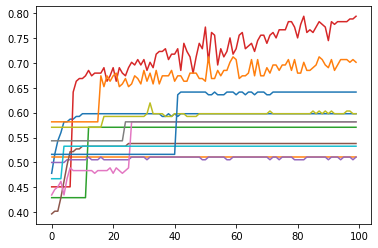

In [ ]:
#on va modifier la fonction d'activation dans la couche cachée : relu -> softmax
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model2 = Sequential()
    model2.add(Dense(4, input_shape=(X_train.shape[1],), activation='softmax')) #hidden layer 1
    model2.add(Dense(1, activation='sigmoid')) #output
    
    model2.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model2.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']

plt.plot(acc.T)

On voit que la performance est diminuée même sans la calculer.

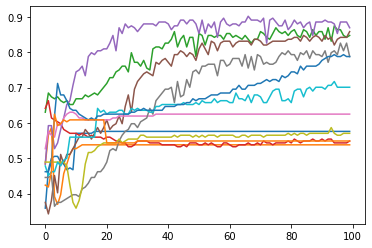

In [ ]:
#on va modifier la fonction d'activation dans la couche cachée : relu -> softplus
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model2 = Sequential()
    model2.add(Dense(4, input_shape=(X_train.shape[1],), activation='softplus')) #hidden layer 1
    model2.add(Dense(1, activation='sigmoid')) #output
    
    model2.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model2.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']

plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_3=np.mean(moyacc)
print(acc_3)

0.6894021729628245


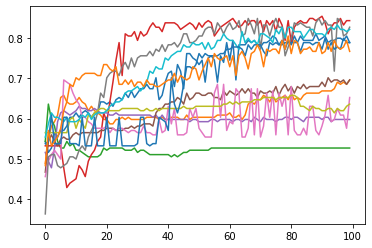

In [ ]:
#on va modifier la fonction d'activation dans la couche cachée : relu -> elu
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model2 = Sequential()
    model2.add(Dense(4, input_shape=(X_train.shape[1],), activation='softplus')) #hidden layer 1
    model2.add(Dense(1, activation='sigmoid')) #output
    
    model2.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model2.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']

plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_3=np.mean(moyacc)
print(acc_3)

0.716123190522194


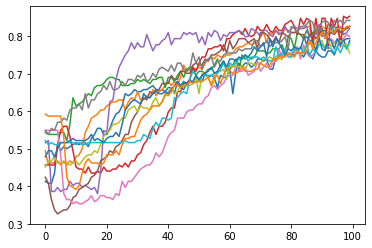

In [ ]:
#on va modifier la fonction d'activation dans la couche cachée : relu -> leaky relu
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model2 = Sequential()
    model2.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model2.add(Dense(1, activation='sigmoid')) #output
    
    model2.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model2.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_3=np.mean(moyacc)
print(acc_3)

0.8061594218015672


La fonction Leaky ReLU est très satisfaisante : elle produit des résultats beaucoup plus stables que les fonctions d'activation précédentes (moins d'écart entre les différentes courbes d'accuracy). On va donc l'adopter dans notre réseau de neurones.

**Meilleur modèle : accuracy = 0.81**

#### Paramètre 2 : optimiseur

Notre optimiseur actuel, Adam, produit de bons résultats qu'on va essayer d'améliorer en testant d'autres optimiseurs : Adadelta, Adamax et SGD (stochastic gradient descent).

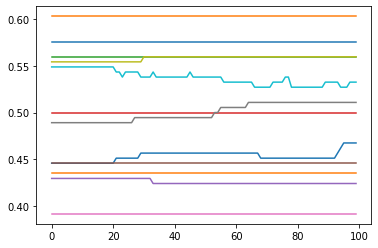

In [ ]:
#adam -> adadelta
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model3 = Sequential()
    model3.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model3.add(Dense(1, activation='sigmoid')) #output
    
    model3.compile(optimizer='Adadelta', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model3.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

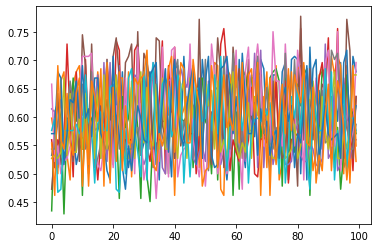

In [ ]:
#adam -> SGD
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model3 = Sequential()
    model3.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model3.add(Dense(1, activation='sigmoid')) #output
    
    model3.compile(optimizer='SGD', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model3.fit(X_train, Y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

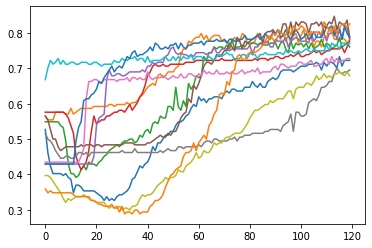

In [ ]:
#adam -> adamax
epochs=120
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model3 = Sequential()
    model3.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model3.add(Dense(1, activation='sigmoid')) #output
    
    model3.compile(optimizer='Adamax', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    history = model3.fit(X_train, Y_train,
                    epochs=120,
                    batch_size=20,
                    validation_data = (X_test, Y_test),
                    verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

Adam est l'optimiseur le plus efficace dans notre cas.

#### Paramètre 4 : batch size

On a gardé jusqu'ici une batch size de 20, ce qui signifie que les poids du réseau sont mis à jours toutes les 20 observations. On va regarder l'influence de la batch size sur la performance.

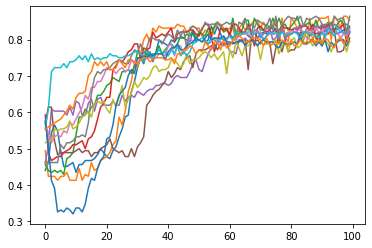

In [ ]:
#batch size 20 -> 10

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_4=np.mean(moyacc)
print(acc_4)

0.819202900926272


La diminution de la batch size a très légèrement augmenté les performances.

**Meilleur modèle : accuracy = 0.82**

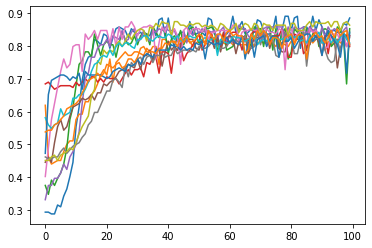

In [ ]:
#batch size 10 -> 5

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=5,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_5=np.mean(moyacc)
print(acc_5)

0.8260869532823562


La performance a légèrement augmenté, mais l'accuracy semble moins stable : il s'agira de faire un compromis. On va continuer nos tests pour l'instant.

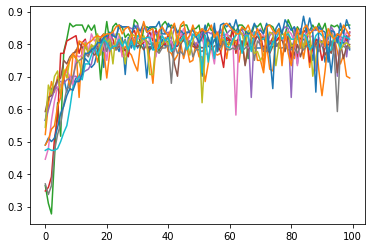

In [ ]:
#batch size 10 -> 1

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=1,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

La diminution de la batch size augmente l'instabilité de la performance (beaucoup de bruit). Afin de limiter cela, on va définir notre batch size optimale à **10**, bien que l'accuracy était meilleure avec batch size = 5.

#### Paramètre 5 : learning rate

Nous avons établi précédemment que l'optimiseur Adam était le plus efficace ; cependant, nous avions gardé le learning rate par défaut de chaque optimiseur. On va d'abord tester d'autres learning rates pour Adam, le learning rate par défaut étant **0.001**.

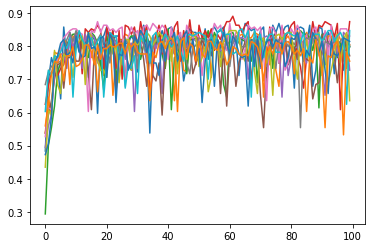

In [ ]:
#learning rates : 0.01 ; 0.0001 ; 0.005 ; 0,0005.
from keras.optimizers import Adam

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer=Adam(learning_rate=0.01), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

Il y a trop de bruit pour lr = 0.01

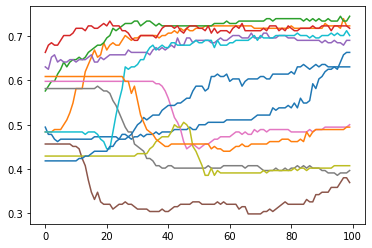

In [ ]:
#learning rates : 0.01 ; 0.0001 ; 0,0005.
from keras.optimizers import Adam

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

Il n'y a pas de convergence de la performance pour lr = 0.0001.

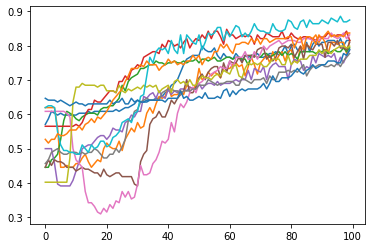

In [ ]:
#learning rates : 0.01 ; 0.0001 ; 0,0005.
from keras.optimizers import Adam

epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model7 = Sequential()
    model7.add(LeakyReLU(4, input_shape=(X_train.shape[1],))) #hidden layer 1
    model7.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model7.compile(optimizer=Adam(learning_rate=0.0005), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model7.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

On obtient des bonnes courbes : on va calculer la performance

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_4=np.mean(moyacc)
print(acc_4)

0.8041666666666667


La performance est légèrement plus faible que précédemment. On va garder le learning rate par défaut qui semble optimal.

#### Paramètre 6 : nombre de neurones dans la couche cachée

On a pris initialement 4 neurones dans la couche cachée, ce qui semble correct au vu des bons résultats obtenus. Nous allons voir si augmenter le nombre de neurones augmente la performance, tout en faisant attention au risque élevé de surapprentissage.

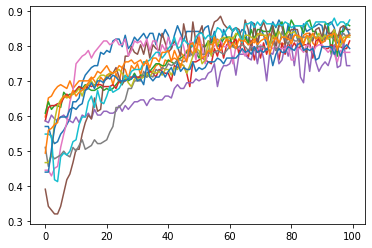

In [ ]:
#4 -> 5 neurones
#crossvalidation sur 12 ensembles comme précédemment
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model6 = Sequential()
    model6.add(LeakyReLU(5, input_shape=(X_train.shape[1],))) #hidden layer 1
    model6.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model6.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model6.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
print(moyacc) #afin de voir s'il y a beaucoup de bruit
moyacc=np.mean(moyacc,axis=1)
acc_6=np.mean(moyacc)
print(acc_6)

[[0.80978262 0.80978262 0.85869563 0.85326087 0.83152175]
 [0.83152175 0.83152175 0.80434781 0.83152175 0.83152175]
 [0.77173913 0.84239131 0.84239131 0.86413044 0.85869563]
 [0.79891306 0.79891306 0.79347825 0.79347825 0.81521738]
 [0.73913044 0.74456519 0.81521738 0.74456519 0.74456519]
 [0.82065219 0.85326087 0.85869563 0.84782606 0.84782606]
 [0.75543481 0.7880435  0.78260869 0.78260869 0.78260869]
 [0.82608694 0.82608694 0.8369565  0.82608694 0.8369565 ]
 [0.82065219 0.79891306 0.82608694 0.82608694 0.82608694]
 [0.85869563 0.86956519 0.86956519 0.85869563 0.875     ]
 [0.79891306 0.77173913 0.79347825 0.80434781 0.79347825]
 [0.7880435  0.83152175 0.80978262 0.82608694 0.83152175]]
0.8168478210767111


La performance est du même ordre, bien qu'on ait ajouté un neurone. On va donc garder neurones = 4 dans la couche cachée et on va plutôt s'intéresser au gain de performance si on ajoute une deuxième couche cachée. On va faire cette deuxième couche plus petite que la première (encore pour éviter le surapprentissage).

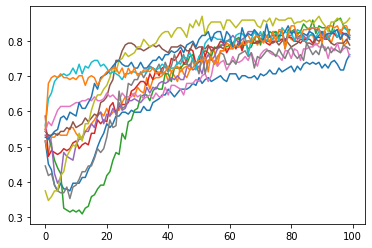

In [ ]:
#ajout d'une deuxième couche cachée de deux neurones
epochs=100
nb_run=12
acc=np.zeros((nb_run,epochs)) #matrice d'accuracy

for i in range(nb_run):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    
    #réinitialiser le modèle sinon ça garde les résultats en mémoire
    model6 = Sequential()
    model6.add(LeakyReLU(5, input_shape=(X_train.shape[1],))) #hidden layer 1
    model6.add(LeakyReLU(2)) #on garde la même fonction d'activation
    model6.add(Dense(1, activation='sigmoid')) #output

    # compile the model
    model6.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = model6.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    acc[i,:]=history.history['val_accuracy']
    
plt.plot(acc.T)

In [ ]:
#on va lisser sur les 5 dernières val avant de faire la moyenne
moyacc=acc[:,-5:]
moyacc=np.mean(moyacc,axis=1)
acc_6=np.mean(moyacc)
print(acc_6)

0.8084239145119985


La performance n'a pas augmenté ; on va rester sur notre modèle initial (une couche cachée de 4 neurones).

### Modèle final

On obtient finalement la meilleure performance avec le modèle suivant : 
- nombre de couches cachées : 1
- nombre de neurones dans la couche cachée : 4
- fonction d'activation de la couche cachée : leaky reLU
- fonction de perte (loss) : binary crossentropy
- batch size : 10
- optimiseur : Adam
- learning rate : 0.001

On décide de ne pas étudier le paramètre epoch (nombre d'itérations) car epoch = 100 suffisait à avoir une accuracy qui converge vers une valeur limite sans pour autant trop tourner. 

#### Erreurs de classification, matrice de confusion, ROC, AUC

6/6 [==============================] - 0s 2ms/step
Matrice de confusion : 
 [[71 13]
 [ 9 91]]
AUC :  0.8776190476190477
6/6 [==============================] - 0s 2ms/step
Matrice de confusion : 
 [[77  6]
 [26 75]]
AUC :  0.8351425503996183
6/6 [==============================] - 0s 2ms/step
Matrice de confusion : 
 [[63 15]
 [27 79]]
AUC :  0.7764876632801161
6/6 [==============================] - 0s 2ms/step
Matrice de confusion : 
 [[67  5]
 [24 88]]
AUC :  0.8581349206349206
6/6 [==============================] - 0s 2ms/step
Matrice de confusion : 
 [[68 16]
 [19 81]]
AUC :  0.8097619047619048


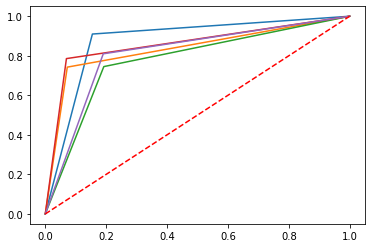

In [ ]:
#on va faire plusieurs tests étant donné qu'on a pas d'ensemble test réservé pour cette partie
#(nos ensembles tests précédents étaient des ensembles de validation)
from sklearn.metrics import confusion_matrix,roc_curve,auc
nb_tests=5

for i in range(nb_tests):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    #------------------------#
    # ENTRAINEMENT DU MODELE #
    #------------------------#
    #notre modèle
    modelf = Sequential()
    modelf.add(LeakyReLU(4, input_shape=(X_train.shape[1],)))
    modelf.add(Dense(1, activation='sigmoid'))

    # compile the model
    modelf.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # now we just update our model fit call
    history = modelf.fit(X_train, Y_train,
                        epochs=100,
                        batch_size=10,
                        validation_data = (X_test, Y_test),
                        verbose=0)
    
    #----------------------#
    # CALCUL DES METRIQUES #
    #----------------------#
    #matrice de confusion
    y_prob = modelf.predict(X_test)
    y_pred=y_prob #initialisation
    for i in range(len(y_prob)):
        if y_prob[i]<0.5:
            y_pred[i]=0
        else:
            y_pred[i]=1
    print('Matrice de confusion :','\n',confusion_matrix(Y_test, y_pred)) # order matters! (actual, predicted)

    #courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    plt.plot(fpr,tpr) #courbe ROC
    print('AUC : ',auc(fpr,tpr))
plt.plot([0,1],[0,1],color='r',linestyle='dashed')

On voit une moyenne de 32 erreurs de classification sur 184 valeurs, c'est-à-dire une accuracy de **0.83**. Cela est confirmé par l'AUC. On peut visualiser la bonne performance du modèle avec la courbe ROC, qui est proche de la courbe idéale (AUC de 1).

### Conclusion

Malgré la bonne performance de notre modèle, on semble atteindre un plafond de performance impossible à dépasser, peu importe les paramètres choisis. On peut supposer que l'ensemble d'apprentissage n'était pas assez large pour atteindre un "meilleur" apprentissage.

# Problème IV : Time series analysis

Dans cette partie, nous allons implémenter un réseau de neurones de type LSTM de haute performance pour prédire le taux d’ammonium mensuel dans
l’eau du Danube à un point géographique bien défini

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax,Dropout,SimpleRNN
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from matplotlib import pyplot
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Notre base de donnée contient deux variables et 264 individus, la première colonne qui contient la date nous n'intéresse pas, étant donné que chaque observation est séparée par le même intervalle d'un mois. Du coup on va exclure cette colonne et garder seulement la deuxième 

In [ ]:
data = pd.read_csv("Danube ammonium level Time Series.csv",usecols=[1],sep=";")
dataframe=data.replace(",",".",regex=True)
dataframe

,Ammonium
0,0.253333
1,0.218889
2,0.242
3,0.134545
4,0.113333
...,...
259,0.031222
260,0.045875
261,0.032474
262,0.047125


On visualise notre série temporelle de taux d’ammonium mensuel, et on remarque une tandance à la baisse au fil de temps ainsi qu'une périodicité. 

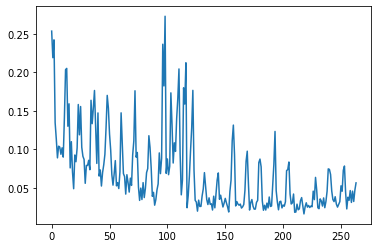

In [ ]:
data1=dataframe.values
data1=data1.astype("float32")
plt.plot(data1)
plt.show()

Les LSTM sont sensibles à l'échelle des données d'entrée, en particulier lorsque les fonctions d'activation sigmoïde (par défaut) ou tanh sont utilisées. Pour cette raison, il sera judicieux de redimensionner les données dans la plage de 0 à 1, autrement dit de normaliser les données. on utilise pour ce faire, la classe de prétraitement MinMaxScaler de la bibliothèque scikit-learn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data1=pd.DataFrame(data1)
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data1)

on Considére les observations de 01/01/1996 jusqu’à 01/12/2016 pour l’apprentissage et de 01/01/2017 jusqu’à 01/12/2017
pour le test .

In [ ]:
data_train=data_scaled[:252,:]
data_test=data_scaled[252:264,:]

On présente les données selon deux colonnes: la première pour le taux d'ammonium à un instant t et la deuxième pour le taux à l'instant t+1. La fonction  qu'on va utiliser pour cette raison prend deux arguments : le dataset , qui est un tableau NumPy que nous souhaitons convertir en un ensemble de données, et le look_back , qui est le nombre de pas de temps précédents à utiliser comme variables d'entrée pour prédire la prochaine période de temps — dans ce cas, par défaut à 1. 

On Utilise notamment cette fonction pour préparer les ensembles de données d'entraînement et de test pour la modélisation.

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX,dataY=[],[]
    for i in range (len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)


In [ ]:
look_back=1
trainX,trainY=create_dataset(data_train,look_back)
testX,testY=create_dataset(data_test,look_back)
# retropropagation full time 
table=np.zeros([len(trainX),2])
for i in range (len(trainX)):
    table[i,0]=trainX[i]
    table[i,1]=trainY[i]
print(pd.DataFrame(table))

            0         1
0    0.924748  0.790351
1    0.790351  0.880528
2    0.880528  0.461250
3    0.461250  0.378483
4    0.378483  0.283539
..        ...       ...
245  0.086981  0.049671
246  0.049671  0.034434
247  0.034434  0.048223
248  0.048223  0.061997
249  0.061997  0.142095

[250 rows x 2 columns]


Le réseau LSTM s'attend à ce que les données d'entrée soient fournies avec une structure de tableau spécifique sous la forme de [échantillons, pas de temps, caractéristiques].

Actuellement, les données se présentent sous la forme [d'échantillons, de caractéristiques ] et nous définissons le problème comme un pas de temps pour chaque échantillon. nous transformons les données d'entrée d'entraînement et de test préparées dans la structure attendue à l'aide de numpy.reshape()

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


### LSTM


Dans un un premier temps nous implémentons un modèle LSTM avec une seule couche cachée qui contient 5 neuronnes et un seul neuronne de sortie puisque on traite un problème de régression, en utilisant  notamment la fonction d'otimisation adam

In [ ]:
model=Sequential()
model.add(LSTM(5,input_shape=(1,look_back),activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,batch_size=1,verbose=2)

Epoch 1/100
250/250 - 3s - loss: 0.0445 - val_loss: 0.0068 - 3s/epoch - 11ms/step
Epoch 2/100
250/250 - 1s - loss: 0.0306 - val_loss: 0.0115 - 713ms/epoch - 3ms/step
Epoch 3/100
250/250 - 1s - loss: 0.0286 - val_loss: 0.0119 - 639ms/epoch - 3ms/step
Epoch 4/100
250/250 - 1s - loss: 0.0268 - val_loss: 0.0100 - 635ms/epoch - 3ms/step
Epoch 5/100
250/250 - 1s - loss: 0.0252 - val_loss: 0.0090 - 765ms/epoch - 3ms/step
Epoch 6/100
250/250 - 1s - loss: 0.0237 - val_loss: 0.0087 - 827ms/epoch - 3ms/step
Epoch 7/100
250/250 - 1s - loss: 0.0225 - val_loss: 0.0079 - 819ms/epoch - 3ms/step
Epoch 8/100
250/250 - 1s - loss: 0.0216 - val_loss: 0.0085 - 659ms/epoch - 3ms/step
Epoch 9/100
250/250 - 1s - loss: 0.0209 - val_loss: 0.0065 - 751ms/epoch - 3ms/step
Epoch 10/100
250/250 - 1s - loss: 0.0203 - val_loss: 0.0076 - 711ms/epoch - 3ms/step
Epoch 11/100
250/250 - 1s - loss: 0.0201 - val_loss: 0.0055 - 749ms/epoch - 3ms/step
Epoch 12/100
250/250 - 1s - loss: 0.0198 - val_loss: 0.0060 - 731ms/epoch - 

Après l'entraînement de nos donnée on visuale la courbe d'erreur et on remarque  que l'erreur de prédiction sur les données test est inférieur à celle des données train.Chose qui indique la non existance d'un sur-apprentissage

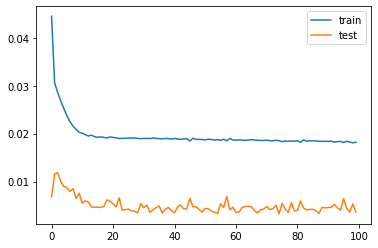

In [ ]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

Avant de calculer la performance de notre modèle, on doit d'abord retransformer (l’inverse de la normalisation qui a été faite dans le point 1) les résultats obtenus en prédiction afin d’obtenir des vrais taux d’ammonium.

In [ ]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])


1/1 [==============================] - 0s 23ms/step


In [ ]:
print('RMSE:' + str(math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))))
print('MAE:'+str(mean_absolute_error(testY[0],testPredict[:,0]))) 
print('MSE:'+str(mean_squared_error(testY[0],testPredict[:,0])))

RMSE:0.015442510150151972
MAE:0.012979459563216278
MSE:0.0002384711197375467


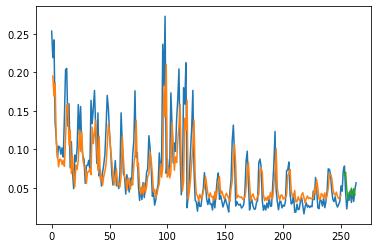

In [ ]:
#Shift train prediction for plotting
trainPredictPlot=np.empty_like(data_scaled)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict
testPredictPlot=np.empty_like(data_scaled)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_scaled)-1,:]=testPredict
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Dans le graphique ci dessus, la courbe blue présente nos données initail, la courbe orange la courbe des prédictions des données d'apprentissage et la courbe verte les prédictions  des données test. Dans ce test on trouve une valeur de RMSE assez petite 0.015 mais on va essayer de la diminuer de plus. 

Compte tenu de la nature stochastique de l'algorithme, de la procédure d'évaluation, et des différences de précision numérique. les résultats varie à chaque fois qu'on execute sans même rien changer pour cette raison on va envisager d'exécuter le modèle plusieurs fois et comparez le résultat moyen

### Grid search:

On effectue une grid search afin de voir les paramètres optimaux qui vont augmenter la performance du modèle. On varie le nombre des neuronnes dans la couche cachée et la fonction d'optimisation. On ajoute notamment une couche de dropout

In [ ]:
best_s=1
for n in [1,5,10,15,20]:
    for opt in ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']:
            model=Sequential()
            model.add(LSTM(n,input_shape=(1,look_back),activation='sigmoid'))
            model.add(Dropout(0.1))
            model.add(Dense(1,activation='linear'))
            model.compile(loss='mean_squared_error',optimizer=opt)
            for i in range(5):
                model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
                model.reset_states()
            trainPredict=model.predict(trainX,batch_size=1)
            model.reset_states()
            testPredict=model.predict(testX,batch_size=1)
            trainPredict=scaler.inverse_transform(trainPredict)
            testPredict=scaler.inverse_transform(testPredict)
            testY=scaler.inverse_transform([testY])
            rmse=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
            if rmse<best_s:
                best_s=rmse
                best_clf=model
                best_para={'neurons': n,'optimization':opt}
                print(best_s)
                print(best_para)
            trainX,trainY=create_dataset(data_train,look_back)
            testX,testY=create_dataset(data_test,look_back)
            trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
            testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
250/250 - 0s - loss: 0.0457 - 372ms/epoch - 1ms/step
Epoch 7/100
250/250 - 0s - loss: 0.0484 - 384ms/epoch - 2ms/step
Epoch 8/100
250/250 - 0s - loss: 0.0482 - 371ms/epoch - 1ms/step
Epoch 9/100
250/250 - 0s - loss: 0.0439 - 392ms/epoch - 2ms/step
Epoch 10/100
250/250 - 0s - loss: 0.0489 - 384ms/epoch - 2ms/step
Epoch 11/100
250/250 - 0s - loss: 0.0400 - 386ms/epoch - 2ms/step
Epoch 12/100
250/250 - 0s - loss: 0.0430 - 385ms/epoch - 2ms/step
Epoch 13/100
250/250 - 0s - loss: 0.0436 - 377ms/epoch - 2ms/step
Epoch 14/100
250/250 - 0s - loss: 0.0440 - 387ms/epoch - 2ms/step
Epoch 15/100
250/250 - 0s - loss: 0.0464 - 380ms/epoch - 2ms/step
Epoch 16/100
250/250 - 0s - loss: 0.0383 - 372ms/epoch - 1ms/step
Epoch 17/100
250/250 - 0s - loss: 0.0402 - 391ms/epoch - 2ms/step
Epoch 18/100
250/250 - 0s - loss: 0.0401 - 379ms/epoch - 2ms/step
Epoch 19/100
250/250 - 0s - loss: 0.0429 - 378ms/epoch - 2ms/step
Epoch 20/100
2

In [ ]:
print(best_s)
print(best_para)

0.013724839224358241
{'neurons': 15, 'optimization': 'SGD'}


La plus petite valeur qu'on peut atteindre est 0.013, on va essayer maintenant de diminuer cette valeur avec le nombre de couches puis on implémente d'autre variation du modèle LSTM.

### 2 couches cachées:

On ajoute une couche cachée qui contient un seul neurone avec bien évidemment, la première couche qui contient 5 neurones. Tout en ajoutant à chaque fois une couche de dropout. Le dropout fait le travail de la régularisation dans les réseaux de neurones et du coup on augmente la performance sans avoir peur de tomber dans le surapprentissage. 

In [ ]:
model = Sequential() 
model.add(LSTM(5,return_sequences=True, input_shape=(1,look_back),activation='sigmoid')) #10
model.add(Dropout(0.1)) 
model.add( LSTM(1,return_sequences=False)) 
model.add(Dropout(0.1)) 
model.add(Dense(1,activation='linear')) 
model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
trainPredict=model.predict(trainX,batch_size=1)
testPredict=model.predict(testX,batch_size=1)
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

Epoch 1/100
250/250 - 6s - loss: 0.0436 - 6s/epoch - 22ms/step
Epoch 2/100
250/250 - 1s - loss: 0.0376 - 1s/epoch - 5ms/step
Epoch 3/100
250/250 - 1s - loss: 0.0374 - 969ms/epoch - 4ms/step
Epoch 4/100
250/250 - 1s - loss: 0.0386 - 1s/epoch - 4ms/step
Epoch 5/100
250/250 - 1s - loss: 0.0374 - 508ms/epoch - 2ms/step
Epoch 6/100
250/250 - 1s - loss: 0.0368 - 571ms/epoch - 2ms/step
Epoch 7/100
250/250 - 1s - loss: 0.0367 - 635ms/epoch - 3ms/step
Epoch 8/100
250/250 - 1s - loss: 0.0364 - 577ms/epoch - 2ms/step
Epoch 9/100
250/250 - 1s - loss: 0.0379 - 542ms/epoch - 2ms/step
Epoch 10/100
250/250 - 1s - loss: 0.0370 - 527ms/epoch - 2ms/step
Epoch 11/100
250/250 - 1s - loss: 0.0355 - 547ms/epoch - 2ms/step
Epoch 12/100
250/250 - 1s - loss: 0.0363 - 519ms/epoch - 2ms/step
Epoch 13/100
250/250 - 1s - loss: 0.0340 - 561ms/epoch - 2ms/step
Epoch 14/100
250/250 - 1s - loss: 0.0349 - 636ms/epoch - 3ms/step
Epoch 15/100
250/250 - 1s - loss: 0.0337 - 965ms/epoch - 4ms/step
Epoch 16/100
250/250 - 1s -

In [ ]:
print('RMSE:' + str(math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))))
print('MAE:'+str(mean_absolute_error(testY[0],testPredict[:,0]))) 
print('MSE:'+str(mean_squared_error(testY[0],testPredict[:,0])))

RMSE:0.01703040623283856
MAE:0.013005502401902075
MSE:0.0002900347364555064


La valeur de RMSE et des autres paramètres de performance ont eu une petite augmentation, pour cette raison on va implémenter encore une fois une grid search pour voir la plus petite rmse qu'on peut atteindre

In [ ]:
best_s=1
for n in [5,10,20,30,40,50,60]:
    for m in [5,10,20,30,40]:
            model = Sequential() 
            model.add(LSTM(5,return_sequences=True, input_shape=(1,look_back),activation='sigmoid')) #10
            model.add(Dropout(0.1)) 
            model.add( LSTM(1,return_sequences=False)) 
            model.add(Dropout(0.1)) 
            model.add(Dense(1,activation='linear')) 
            model.compile(loss='mean_squared_error',optimizer='adam')
            model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
            trainPredict=model.predict(trainX,batch_size=1)
            testPredict=model.predict(testX,batch_size=1)
            trainPredict=scaler.inverse_transform(trainPredict)
            testPredict=scaler.inverse_transform(testPredict)
            testY=scaler.inverse_transform([testY])
            rmse=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
            if rmse<best_s:
                best_s=rmse
                best_clf=model
                best_para={'neurons1': n,'neurones2':m}
                print(best_s)
                print(best_para)
            trainX,trainY=create_dataset(data_train,look_back)
            testX,testY=create_dataset(data_test,look_back)
            trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
            testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
250/250 - 1s - loss: 0.0280 - 561ms/epoch - 2ms/step
Epoch 28/100
250/250 - 1s - loss: 0.0259 - 574ms/epoch - 2ms/step
Epoch 29/100
250/250 - 1s - loss: 0.0286 - 534ms/epoch - 2ms/step
Epoch 30/100
250/250 - 1s - loss: 0.0267 - 557ms/epoch - 2ms/step
Epoch 31/100
250/250 - 1s - loss: 0.0253 - 602ms/epoch - 2ms/step
Epoch 32/100
250/250 - 1s - loss: 0.0254 - 563ms/epoch - 2ms/step
Epoch 33/100
250/250 - 1s - loss: 0.0249 - 593ms/epoch - 2ms/step
Epoch 34/100
250/250 - 1s - loss: 0.0223 - 562ms/epoch - 2ms/step
Epoch 35/100
250/250 - 1s - loss: 0.0259 - 553ms/epoch - 2ms/step
Epoch 36/100
250/250 - 1s - loss: 0.0241 - 546ms/epoch - 2ms/step
Epoch 37/100
250/250 - 1s - loss: 0.0282 - 564ms/epoch - 2ms/step
Epoch 38/100
250/250 - 1s - loss: 0.0266 - 567ms/epoch - 2ms/step
Epoch 39/100
250/250 - 1s - loss: 0.0242 - 571ms/epoch - 2ms/step
Epoch 40/100
250/250 - 1s - loss: 0.0267 - 536ms/epoch - 2ms/step
Epoch 41/10

In [ ]:
print(best_s)
print(best_para)

0.016522673194769827
{'neurons1': 40, 'neurones2': 20}


La rmse est élevé par rapport à celle trouver dans le premier modèle.

Le grid search que ce soit dans ce modèle ou le modèle précedent prend beaucoup de temps afin d'être executer, un temps qui dépace 2 heures et demi. Pour cette raison on ne prend pas des intervalles de variation des paramètres assez vaste, ainsi, on affectue pas la recherche sur tous les paramètres.   

### LSTM  avec des pas de temps

On a pensé à formuler le problème de sorte que plusieurs pas de temps récents puissent être utilisés pour faire la prédiction pour le prochain pas de temps. Autrement dit, étant donné le temps courant (t) pour prédire la valeur au temps suivant dans la séquence (t+1), on va utiliser le temps courant (t), ainsi que les deux temps précédents (t-1 et t -2) comme variables d'entrée. Pour ce faire, il suffit d'augmeter look_back de 1 à 2,3 ou 4. Sauf que là on ne change pas juste le look_back mais aussi le pas de temps. 

Sachant que les pas de temps fournissent une autre façon de formuler notre problème de série chronologique, on va formuler les observations passées pour les utiliser comme pas de temps d'une entité entrée, ce qui est en effet un cadrage plus précis du problème. Pour ce faire, lors de la remodelation on va définir les colonnes comme étant la dimension des pas de temps et on va redéfinir notamment la dimension des caractéristiques sur 1. " np.reshape(data,data.shape[0],data.shape[1],1)"

In [ ]:
look_back = 4
trainX, trainY = create_dataset(data_train, look_back)
testX, testY = create_dataset(data_test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(10, input_shape=(look_back, 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
for i in range(10):
	model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
247/247 - 4s - loss: 0.0385 - 4s/epoch - 16ms/step
Epoch 2/100
247/247 - 1s - loss: 0.0241 - 753ms/epoch - 3ms/step
Epoch 3/100
247/247 - 1s - loss: 0.0235 - 668ms/epoch - 3ms/step
Epoch 4/100
247/247 - 1s - loss: 0.0235 - 789ms/epoch - 3ms/step
Epoch 5/100
247/247 - 1s - loss: 0.0226 - 733ms/epoch - 3ms/step
Epoch 6/100
247/247 - 1s - loss: 0.0216 - 795ms/epoch - 3ms/step
Epoch 7/100
247/247 - 1s - loss: 0.0208 - 988ms/epoch - 4ms/step
Epoch 8/100
247/247 - 1s - loss: 0.0209 - 895ms/epoch - 4ms/step
Epoch 9/100
247/247 - 1s - loss: 0.0213 - 718ms/epoch - 3ms/step
Epoch 10/100
247/247 - 1s - loss: 0.0181 - 772ms/epoch - 3ms/step
Epoch 11/100
247/247 - 1s - loss: 0.0188 - 815ms/epoch - 3ms/step
Epoch 12/100
247/247 - 1s - loss: 0.0189 - 773ms/epoch - 3ms/step
Epoch 13/100
247/247 - 1s - loss: 0.0189 - 707ms/epoch - 3ms/step
Epoch 14/100
247/247 - 1s - loss: 0.0191 - 663ms/epoch - 3ms/step
Epoch 15/100
247/247 - 1s - loss: 0.0190 - 851ms/epoch - 3ms/step
Epoch 16/100
247/247 

In [ ]:
# calculate root mean squared error
print('RMSE:' + str(math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))))
print('MAE:'+str(mean_absolute_error(testY[0],testPredict[:,0]))) 
print('MSE:'+str(mean_squared_error(testY[0],testPredict[:,0])))

RMSE:0.013219681235442562
MAE:0.012074232592410764
MSE:0.00017475997196671216


On a essayer cette méthode avec un look_back égale à 2,3 et 4 et la dernière valeur nous a donné le meilleur résultat: le rmse à diminuer par rapport au modèle précédents. 

### LSTM empilés avec mémoire entre les lots:

L'un des grands avantages des LSTM est qu'ils peuvent être formés avec  succés lorsqu'ils sont empilés dans des architectures de réseau profondes. Du coup, comme dans le modèle 2, on définit deux couches LSTM, sauf que cette fois ci la première couche doit renvoyer la séquence à la couche d'après et cela se fait en définissant le paramètre return_sequences sur la  couceh sur TRUE. Tout en utilisant un look_back égale à  4 avec des couches de dropout. 

In [ ]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
for i in range(10):
	model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
247/247 - 6s - loss: 0.0303 - 6s/epoch - 24ms/step
Epoch 2/100
247/247 - 1s - loss: 0.0255 - 1s/epoch - 5ms/step
Epoch 3/100
247/247 - 1s - loss: 0.0254 - 1s/epoch - 5ms/step
Epoch 4/100
247/247 - 1s - loss: 0.0260 - 1s/epoch - 4ms/step
Epoch 5/100
247/247 - 1s - loss: 0.0264 - 1s/epoch - 4ms/step
Epoch 6/100
247/247 - 1s - loss: 0.0265 - 1s/epoch - 4ms/step
Epoch 7/100
247/247 - 1s - loss: 0.0258 - 1s/epoch - 5ms/step
Epoch 8/100
247/247 - 1s - loss: 0.0255 - 1s/epoch - 5ms/step
Epoch 9/100
247/247 - 1s - loss: 0.0248 - 1s/epoch - 5ms/step
Epoch 10/100
247/247 - 1s - loss: 0.0252 - 1s/epoch - 4ms/step
Epoch 11/100
247/247 - 1s - loss: 0.0247 - 1s/epoch - 5ms/step
Epoch 12/100
247/247 - 1s - loss: 0.0249 - 1s/epoch - 5ms/step
Epoch 13/100
247/247 - 1s - loss: 0.0237 - 1s/epoch - 5ms/step
Epoch 14/100
247/247 - 1s - loss: 0.0254 - 964ms/epoch - 4ms/step
Epoch 15/100
247/247 - 2s - loss: 0.0211 - 2s/epoch - 8ms/step
Epoch 16/100
247/247 - 2s - loss: 0.0227 - 2s/epoch - 7ms/st

In [ ]:
print('RMSE:' + str(math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))))
print('MAE:'+str(mean_absolute_error(testY[0],testPredict[:,0]))) 
print('MSE:'+str(mean_squared_error(testY[0],testPredict[:,0])))

RMSE:0.009362650748677804
MAE:0.008090834757343424
MSE:8.765922904171704e-05


Les paramèrtres de performances ont tous diminés,et on a arriver à des valeurs assez petites. 

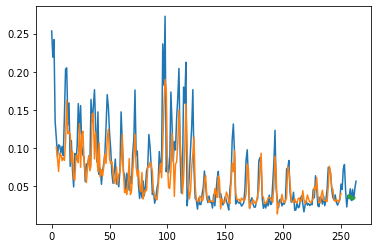

In [ ]:
#Shift train prediction for plotting
trainPredictPlot=np.empty_like(data_scaled)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict
testPredictPlot=np.empty_like(data_scaled)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data_scaled)-1,:]=testPredict
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Meilleur modèle: 
Notre meilleur modèle est le modèle LSTM empilé avec mémoire entre les lots qui  nous donne les valeurs suivante:

RMSE=0.00936

MAE=0.008090

MSE=8.76e-05

ARIMA est choisi en raison de la propriété non stationnaire des données collectées et modélisées.De manière analogue et en tant que représentant des algorithmes basés sur l'apprentissage en profondeur, la méthode LSTM est utilisée en raison de son utilisation dans la préservation et la formation des caractéristiques de données données pendant une plus longue période de temps. Du coup, on vas implémenter trois modèles de série chronologique classique : ARMA ARIMA SARIMAX et on compare notre modèle avec les résultats obtenus.

ARMA et ARIMA ne sont que les composants AR (autorégressif) et MA (moyenne mobile) réunis.

### ARIMA

Le modèle ARMA est une constante plus la somme des retards AR et leurs multiplicateurs, plus la somme des retards MA et leurs multiplicateurs plus le bruit blanc.

Le modele ARMA optimal qu'on trouve est de l'ordre (1,8)

In [ ]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

predicted=0.129692, expected=0.220457
predicted=0.167541, expected=0.242327
predicted=0.207039, expected=0.107712
predicted=0.099961, expected=0.025284
predicted=0.023047, expected=0.084542
predicted=0.092253, expected=0.068935
predicted=0.119833, expected=0.118157
predicted=0.129235, expected=0.058095
predicted=0.098429, expected=0.115270
predicted=0.109155, expected=0.062980
predicted=0.100594, expected=0.120147
predicted=0.111978, expected=0.156973
Test RMSE: 0.015


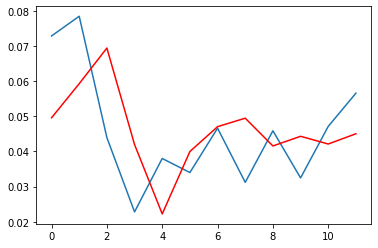

In [ ]:
history = [x for x in data_train]
predictions = list()
# walk-forward validation
import warnings
warnings.filterwarnings("ignore")
for t in range(len(data_test)):
  model = ARIMA(history, order=(  5,0,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = data_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
predictest=scaler.inverse_transform(predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(data_test), predictest))
print('Test RMSE: %.3f' % rmse)
#plot forecasts against actual outcomes
plt.plot(scaler.inverse_transform(data_test))
plt.plot(predictest, color='red')
plt.show()

On trouve un RMSE de 0.015

In [ ]:
history = [x for x in data_train]
trainpred = list()
# walk-forward validation
for t in range(len(data_train)):
  model = ARIMA(history, order=(  5,0,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  trainpred.append(yhat)
  obs = data_train[t]
  history.append(obs)
  #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
trainpred=scaler.inverse_transform(trainpred)

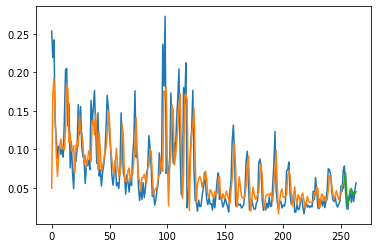

In [ ]:
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainpred)
plt.plot(pd.DataFrame(predictest,index=range(252,264)))
plt.show()

### ARMA

Le modèle ARIMA est un modèle ARMA mais avec une étape de prétraitement incluse l'ordre de différence, qui est le nombre de transformations nécessaires pour rendre les données stationnaires. Ainsi, un modèle ARIMA est simplement un modèle ARMA sur les séries temporelles différenciées.

En utilisant la fonction auto_arima() du package pmdarima, nous pouvons effectuer une recherche de paramètres pour les valeurs optimales du modèle. On a trouver que le modèle le plus optimal est de l'ordre de ( 5,0,1).

predicted=0.146263, expected=0.220457
predicted=0.171875, expected=0.242327
predicted=0.204145, expected=0.107712
predicted=0.111087, expected=0.025284
predicted=0.006396, expected=0.084542
predicted=0.068291, expected=0.068935
predicted=0.140250, expected=0.118157
predicted=0.138960, expected=0.058095
predicted=0.086750, expected=0.115270
predicted=0.103261, expected=0.062980
predicted=0.099317, expected=0.120147
predicted=0.126976, expected=0.156973
Test RMSE: 0.016


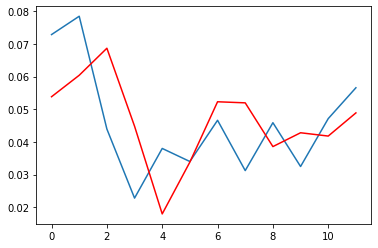

In [ ]:
history = [x for x in data_train]
predictions = list()
#for i in [0]
# walk-forward validation
import warnings
warnings.filterwarnings("ignore")
for t in range(len(data_test)):
  model = ARMA(history, order=( 1,8))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = data_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
predictest=scaler.inverse_transform(predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(data_test), predictest))
print('Test RMSE: %.3f' % rmse)
#plot forecasts against actual outcomes
plt.plot(scaler.inverse_transform(data_test))
plt.plot(predictest, color='red')
plt.show()

Le RMSE totale est de 0.016

In [ ]:
history = [x for x in data_train]
trainpred = list()
# walk-forward validation
for t in range(len(data_train)):
  model = ARMA(history, order=( 1,8))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  trainpred.append(yhat)
  obs = data_train[t]
  history.append(obs)
  #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
trainpred=scaler.inverse_transform(trainpred)

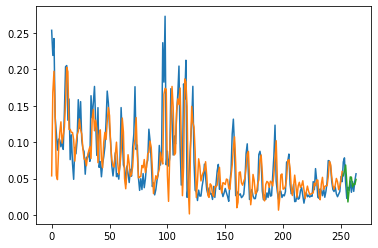

In [ ]:
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainpred)
plt.plot(pd.DataFrame(predictest,index=range(252,264)))
plt.show()

### Sarimax

Le modèle ARIMA est génial, mais inclure la saisonnalité et des variables exogènes dans le modèle peut être extrêmement puissant. Étant donné que le modèle ARIMA suppose que la série chronologique est stationnaire, nous devons utiliser un modèle différent. On choisie SARIMAX

predicted=0.110536, expected=0.220457
predicted=0.138149, expected=0.242327
predicted=0.182333, expected=0.107712
predicted=0.121538, expected=0.025284
predicted=0.042461, expected=0.084542
predicted=0.069326, expected=0.068935
predicted=0.098653, expected=0.118157
predicted=0.131636, expected=0.058095
predicted=0.081394, expected=0.115270
predicted=0.074168, expected=0.062980
predicted=0.068752, expected=0.120147
predicted=0.112961, expected=0.156973
Test RMSE: 0.017


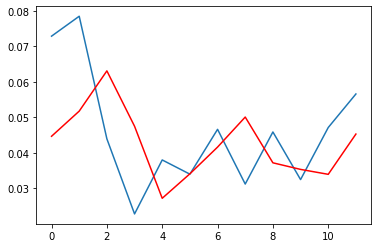

In [ ]:
history = [x for x in data_train]
predictions = list()
#for i in [0]
# walk-forward validation
import warnings
warnings.filterwarnings("ignore")
for t in range(len(data_test)):
  model = SARIMAX(history, order=(  5,0,5))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(np.array([yhat]))
  obs = data_test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
predictest=scaler.inverse_transform(predictions)
rmse = sqrt(mean_squared_error(scaler.inverse_transform(data_test), predictest))
print('Test RMSE: %.3f' % rmse)
#plot forecasts against actual outcomes
plt.plot(scaler.inverse_transform(data_test))
plt.plot(predictest, color='red')
plt.show()

RMSE est égale à 0.017

In [ ]:
history = [x for x in data_train]
trainpred = list()
# walk-forward validation
for t in range(len(data_train)):
  model = ARMA(history, order=( 1,8))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  trainpred.append(np.array(yhat))
  obs = data_train[t]
  history.append(obs)
  #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
trainpred=scaler.inverse_transform(trainpred)

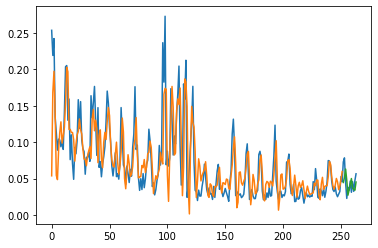

In [ ]:
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainpred)
plt.plot(pd.DataF
         rame(predictest,index=range(252,264)))
plt.show()

Pour les trois modèles on a une RMSE très basse, ce qui prouve que les modèle sont performants et décrivent très bien notre série. Mais LSTM réste plus performante avec une RMSE de 0.009.

### Données complètes

On va commencer par reprendre le meilleur modèle qu'on avait trouvé précédemment, puis on essaiera de l'améliorer.

#### Chargement des données

In [1]:
import pandas as pd
data=pd.read_csv('Danube ammonium level complete data Time Series.csv',sep=';')
#on supprime la colonne months car ce n'est pas une entrée en tant que tel
data.drop('Months',inplace=True,axis=1)
data=data.replace(",",".",regex=True)
data.head(5)

,Ammonium,TSS,Alkalinity,Conductivity,DO,pH,WT
0,0.253333,7.016667,3.836667,455.916667,12.383333,8.056667,2.075
1,0.218889,6.666667,3.968889,458,12.877778,8.068889,1.911111
2,0.242,21.42,3.798,462.9,12.99,8.083,3.93
3,0.134545,13.4,3.337273,399.727273,11.404545,8.18,8.863636
4,0.113333,25.666667,3.032222,350.444444,11.055556,8.393333,14.455556


Visualisant nos séries temporelles.

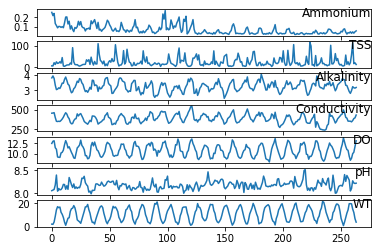

In [5]:
import matplotlib.pyplot as plt
values=data.values
values=values.astype('float32')
i=1
plt.figure()
for j in range(0,7):
    plt.subplot(7,1,i)
    plt.plot(values[:,j])
    plt.title(data.columns[j],y=0.5,loc='right')
    i+=1
plt.show()

In [ ]:
#normalisation des données (sauf ammonium)
from sklearn.preprocessing import MinMaxScaler
data=data.iloc[:,:].values
scaler=MinMaxScaler()
dataX=scaler.fit_transform(data[:,1:])
#le scaler supprime les noms de colonnes donc on les remet
data=np.hstack((np.reshape(data[:,0],(data.shape[0],1)),dataX))
data=pd.DataFrame(data)
data.head(5)

,0,1,2,3,4,5,6
0,0.253333,0.025912,0.847783,0.702526,0.768047,0.12843,0.060203
1,0.218889,0.022756,0.927756,0.70916,0.857998,0.151975,0.052362
2,0.242,0.15578,0.824395,0.724764,0.878414,0.179159,0.148953
3,0.134545,0.083468,0.54573,0.523598,0.589981,0.366024,0.384995
4,0.113333,0.194071,0.361223,0.366663,0.526492,0.776999,0.652531


#### Réseau de neurones

Pour rappel, notre meilleur modèle était un LSTM emplié avec mémoire entre les lots qui donnait les valeurs suivantes :
- RMSE=0.00936
- MAE=0.008090


In [ ]:
#nouveau create_dataset car on a plusieurs variables à présent
def create_dataset(dataset, look_back=1):
    dataX,dataY=[],[]
    for i in range (dataset.shape[0]-look_back):
        a=dataset[i:i+look_back,:]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
#train test split
data=data.iloc[:,:].values
data_train=data[:252,:]
data_test=data[252:264,:]

#formatage des données
look_back = 4
trainX,trainY = create_dataset(data_train, look_back)
testX,testY = create_dataset(data_test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(248, 4, 7) (248,)
(8, 4, 7) (8,)


In [ ]:
batch_size = 1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 7), stateful=True, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 7), stateful=True))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

#pour éviter l'erreur unsupported object type float
trainX=trainX.astype(np.float32)
trainY=trainY.astype(np.float32)
testX=testX.astype(np.float32)
testY=testY.astype(np.float32)

for i in range(10):
	model.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=1, shuffle=False)
	model.reset_states()
 
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

Epoch 1/100
248/248 [==============================] - 4s 4ms/step - loss: 0.0075
Epoch 2/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0034
Epoch 3/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 4/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0020
Epoch 5/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 6/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 7/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 8/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 9/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 10/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 11/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0014
Epoch 12/100
248/248 [==============================] - 1s 3ms/step - loss: 0.0012
Epoch 13/100


In [ ]:
testY=testY.reshape(8,1)
print('RMSE:' + str(math.sqrt(mean_squared_error(testY,testPredict))))
print('MAE:'+str(mean_absolute_error(testY,testPredict))) 
print('MSE:'+str(mean_squared_error(testY,testPredict)))

RMSE:0.008577226133645057
MAE:0.0069310428
MSE:7.356881e-05


On voit que le score a légèrement diminué (RMSE 0.0094 -> 0.0086), ce qui peut s'expliquer par une meilleure connaissance des conditions. On va maintenant essayer d'améliorer ce modèle.

##### Nombre de neurones du réseau

In [ ]:
#4/4 -> 6/4
batch_size = 1

model1 = Sequential()
model1.add(LSTM(6, batch_input_shape=(batch_size, look_back, 7), stateful=True, return_sequences=True))
model1.add(Dropout(0.1))
model1.add(LSTM(4, batch_input_shape=(batch_size, look_back, 7), stateful=True))
model1.add(Dropout(0.1))
model1.add(Dense(1))

model1.compile(loss='mean_squared_error', optimizer='rmsprop')

for i in range(10):
	model1.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=1, shuffle=False)
	model1.reset_states()
 
# make predictions
trainPredict = model1.predict(trainX, batch_size=batch_size)
model1.reset_states()
testPredict = model1.predict(testX, batch_size=batch_size)

Epoch 1/100
248/248 [==============================] - 5s 5ms/step - loss: 0.0059
Epoch 2/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 3/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 4/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 5/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 6/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 7/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 8/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0012
Epoch 9/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 10/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 11/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 12/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 13/100


In [ ]:
print('RMSE:' + str(math.sqrt(mean_squared_error(testY,testPredict))))
print('MAE:'+str(mean_absolute_error(testY,testPredict))) 
print('MSE:'+str(mean_squared_error(testY,testPredict)))

RMSE:0.0067113833818105905
MAE:0.0061103553
MSE:4.5042667e-05


On a augmenté la performance : le RMSE est passé de 0.0086 à 0.0067.

In [ ]:
#6/4 -> 6/6
batch_size = 1

model2 = Sequential()
model2.add(LSTM(6, batch_input_shape=(batch_size, look_back, 7), stateful=True, return_sequences=True))
model2.add(Dropout(0.1))
model2.add(LSTM(6, batch_input_shape=(batch_size, look_back, 7), stateful=True))
model2.add(Dropout(0.1))
model2.add(Dense(1))

model2.compile(loss='mean_squared_error', optimizer='rmsprop')

trainX=trainX.astype(np.float32)
trainY=trainY.astype(np.float32)
testX=testX.astype(np.float32)
testY=testY.astype(np.float32)

for i in range(10):
	model2.fit(trainX, trainY, epochs=100, batch_size=batch_size, verbose=1, shuffle=False)
	model2.reset_states()
 
# make predictions
trainPredict = model2.predict(trainX, batch_size=batch_size)
model2.reset_states()
testPredict = model2.predict(testX, batch_size=batch_size)

Epoch 1/100
248/248 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 2/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0017
Epoch 3/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0014
Epoch 4/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 5/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 6/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 7/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 8/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 9/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 10/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 11/100
248/248 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 12/100
248/248 [==============================] - 1s 4ms/step - loss: 0.0011
Epoch 13/100


In [ ]:
print('RMSE:' + str(math.sqrt(mean_squared_error(testY,testPredict))))
print('MAE:'+str(mean_absolute_error(testY,testPredict))) 
print('MSE:'+str(mean_squared_error(testY,testPredict)))

RMSE:0.0086931887149022
MAE:0.0073247515
MSE:7.557153e-05


On voit que le RMSE a augmenté, ce qui est sûrement signe d'un surapprentissage des données train. On va considérer l'avant-dernier modèle comme étant le meilleur.

#### Conclusion

Les données complètes nous ont permis de réduire la valeur du RMSE de 0.0094 à 0.0067, donc un diminution de l'erreur de presque un tiers. On en conclut que le taux d'ammonium est effectivement corrélé avec les autres grandeurs fournies, bien que la régression soit déjà très bonne sans ces grandeurs.

# Conclusion: 

Les séries chronologiques, en général, sont difficiles à prévoir. S'ils étaient faciles à prévoir, tous les scientifiques des données seraient riches, ayant prévu avec précision la valeur de tous les stocks. La réalité est que les hedge funds, en moyenne, ne surperforment pas le marché et que les prévisions de séries chronologiques sont généralement très médiocres et ne s'appliquent qu'à de très courtes durées. Les principaux problèmes sont qu'il y a beaucoup de bruit, il y a beaucoup d'influences cachées, les modèles sont trop simplistes, les influenceurs ne se comportent pas comme nous pensons qu'ils le devraient, l'interaction entre linéarité et non-linéarité est subtile et déroutante, ... à l'infini. Dans la partie 4 on a essayer plusieurs modèles pour prévoir notre série chronologique. On a réussi à aboutir à des résultat très bien surtout avec le réseau Long Short-Term Memory mais qui ne sont pas bien sur parfait, et déjà le parfait n'existe pas. 